In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error as mae

import matplotlib.pyplot as plt
%matplotlib inline

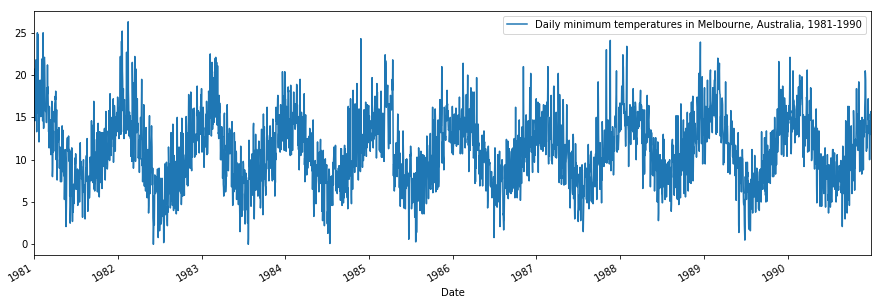

In [2]:
file = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/daily-temp.csv'
df = pd.read_csv(file, parse_dates =["Date"], index_col="Date")
df.plot(figsize=(15,5))

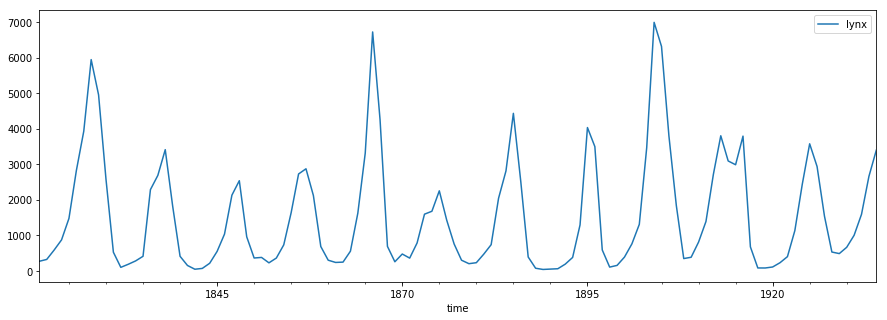

In [3]:
file = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/lynx.csv'
df = pd.read_csv(file, parse_dates =["time"], index_col="time")
df.plot(figsize=(15,5))

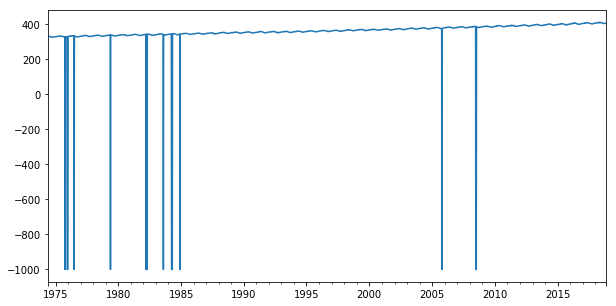

In [4]:
file = 'https://raw.githubusercontent.com/dataworkshop/5dwchallenge_2019/master/challenge5/input/mauna_loa.csv'
df = pd.read_csv(file)
df.index = pd.to_datetime(df[['year', 'month', 'day']])
df.ppm.plot(figsize=(10,5))

In [5]:
df['ppm_fixed'] = df.ppm[df.ppm > 0]
df.ppm_fixed.fillna(method = "backfill", inplace=True)

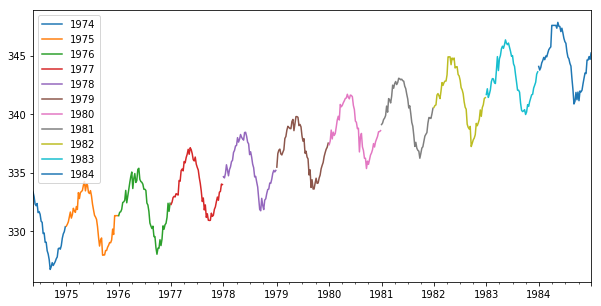

In [6]:
plt.figure(figsize=(10,5))
years = range(1974, 1985)
for year in years:
    df_year = df[df.year == year]
    df_year.ppm_fixed.plot(label = year)
plt.legend()

In [7]:
def linear_func(vals, k = None, b = 0):
    mean_value = [np.mean(vals)] * len(vals)
    if k is None:
        return mean_value
    return [idx*k + b for idx, _ in enumerate(vals)]

In [9]:
df_years = df[df.year.isin(years)]
k = 0.027
b = 330
mean_vals = linear_func(df_years.ppm_fixed)
linear_vals = linear_func(df_years.ppm_fixed, k, b)

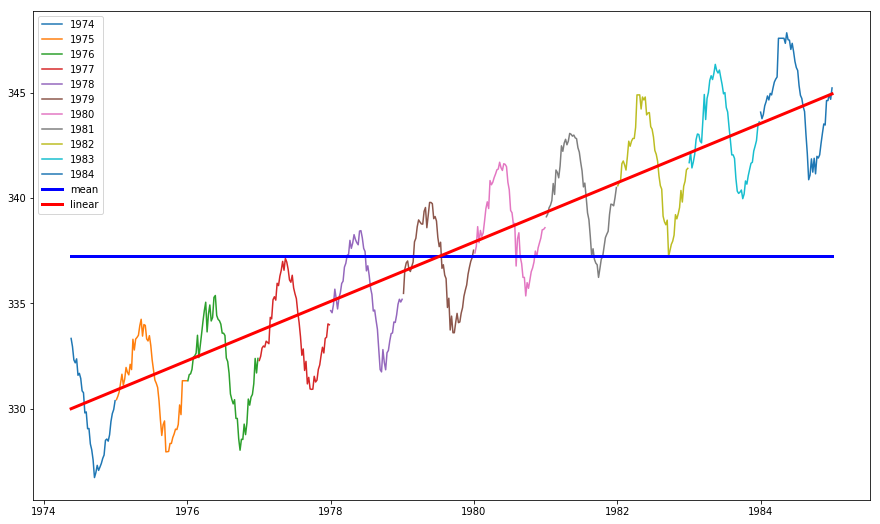

In [12]:
plt.figure(figsize=(15,9))
years = range(1974, 1985)
for year in years:
    df_year = df[df.year == year]
    plt.plot(df_year.index, df_year.ppm_fixed, label = year)  
    
plt.plot(df_years.index, mean_vals, 'b-', label='mean', linewidth=3);
plt.plot(df_years.index, linear_vals, 'r-', label='linear', linewidth=3);    
plt.legend();

In [11]:
mae(df_years.ppm_fixed, mean_vals), mae(df_years.ppm_fixed, linear_vals)

(4.301433714795878, 1.8915765765765757)